# Práctica 10

## Tarea 1: Comparación algoritmos de clustering

<p align="justify">
La librería sklearn incluye diversos algoritmos de clustering entre los que se encuentran el KMeans y el agrupamiento jerárquico aglomerativo. A diferencia de las clases que implementan modelos predictivos, ya sean de regresión o clasificación, las clases que implementan estos métodos no siempre poseen el método predict ya que su finalidad no es la predicción de un valor a partir de una muestra de entrada. El método KMeansse incluye en la librería sklearn en dos clases: KMeans y MiniBatchKMeans. La primera implementa el método básico considerando todo el conjunto de datos, mientras que la segunda implementa una versión que se basa en aplicar el método básico en una muestra lo que reduce el tiempo de ejecución. Los resultados que se obtienen con las dos implementaciones no es el mismo pero MiniBatchKMeans suele dar resultados muy similares a KMeans en un tiempo mucho menor. Ambas clases implementan el método fit para obtener los parámetros definen el método, en el caso del KMeans, los centroides de los clusters. La pertenencia de las muestras a cada cluster viene dado por el parémetro de la clase labels_ que es una lista con tantos elementos como muestrs tiene el conjunto de datos utilizado para entrenar y con valores entre 0 y k-1, siendo k el número de clusters. Una descripción completa de la clase con los argumentos de las mismas así como los atributos se puede encontrar en la documentación de la librería sklearn.
</p>

David Cruz Sánchez

Importamos las librerías necesarias.

In [20]:
from sklearn.cluster import KMeans,AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


Importamos los datos.

In [21]:
df = pd.read_csv("datos_practica10.csv", sep=",")
df

,x1,x2
0,2.659730,2.067395
1,1.185826,3.184824
2,1.518829,3.157938
3,1.528463,0.381238
4,1.014457,0.170009
...,...,...
135,3.437653,0.588719
136,1.208859,1.194507
137,2.657943,0.552290
138,2.381584,-0.688849


No tiene clases pues somos nosotros quienes las definimos con las siguientes funciones.

#### K-means
El primer método es con Kmeans, que comienza colocando las muestras en k clases de forma aleatoria y luego va mejorando la clasificación a través de diferentes iteraciones.

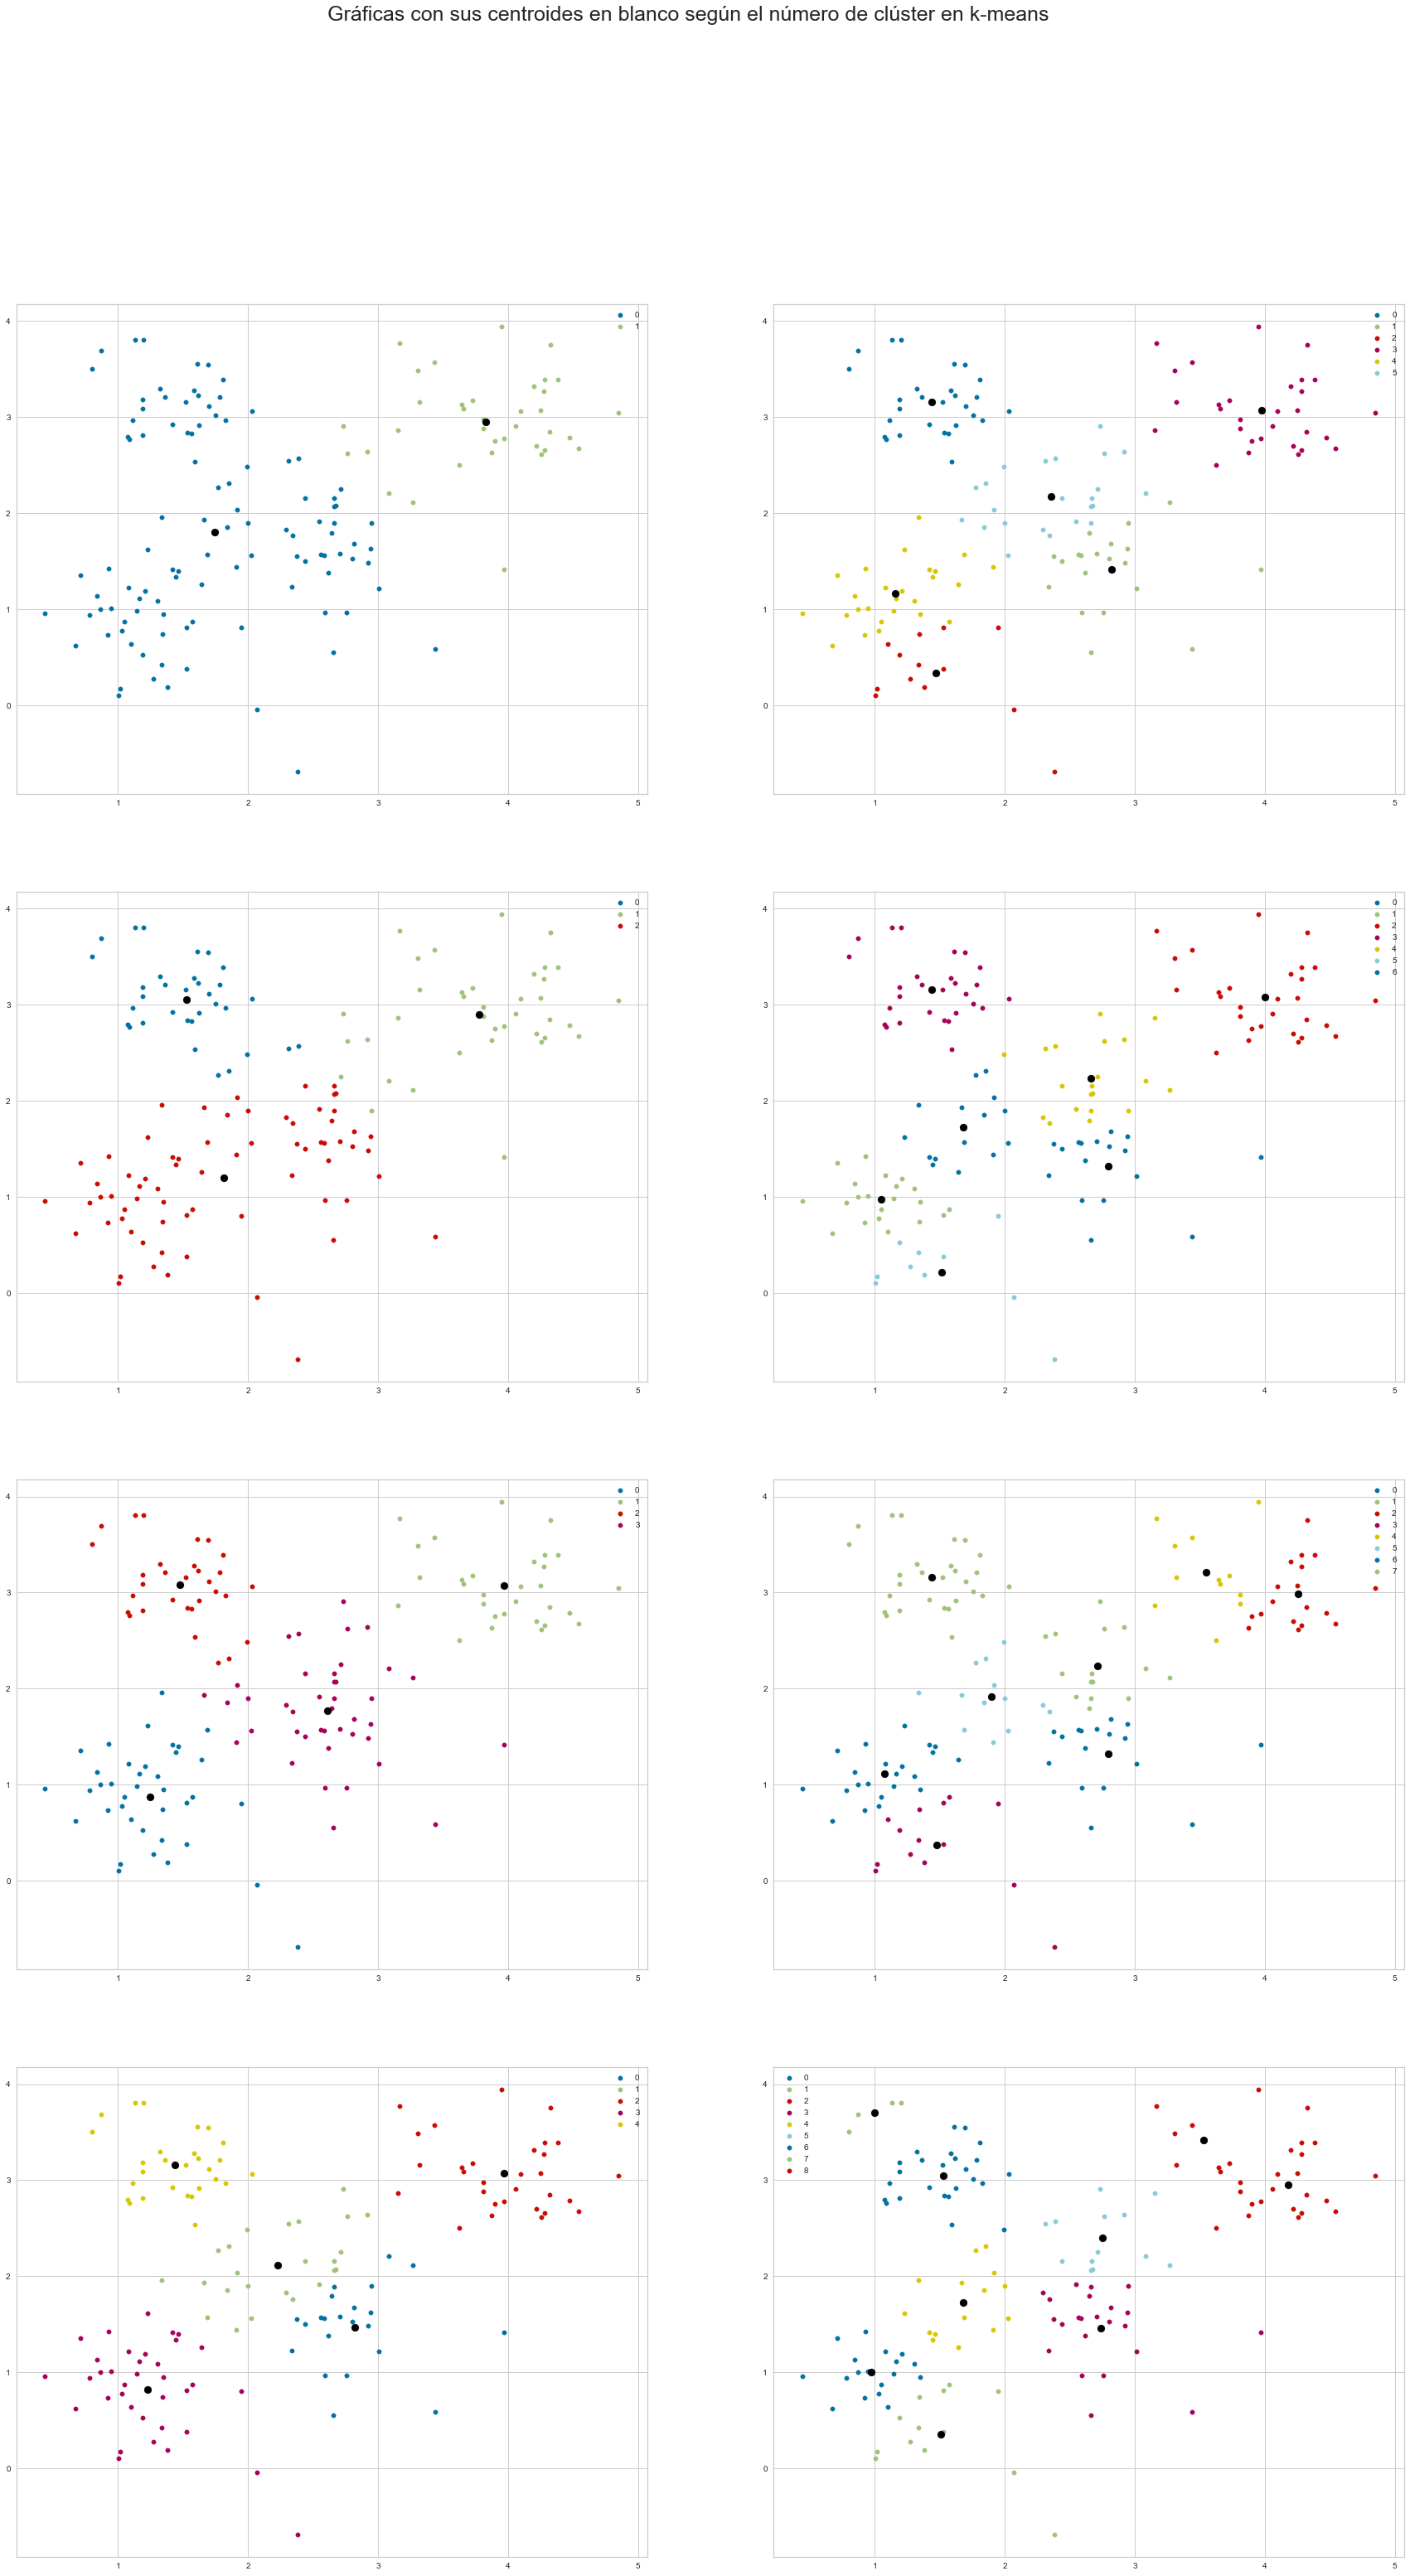

In [22]:

clusters = 8
fig, ax = plt.subplots(nrows=round(clusters/2),ncols=2)
fig.suptitle("Gráficas con sus centroides en blanco según el número de clúster en k-means", fontsize=25)
fig.set_figheight(50)
fig.set_figwidth(30)
ax = np.concatenate((ax[:,0],ax[:,1]))
for k in range(2,clusters+2):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(df)
    df["Labels"] = kmeans.labels_
    for label in np.unique(df["Labels"]):
        ax[k-2].scatter(df[(df["Labels"] == label)].iloc[:,0] ,df[(df["Labels"] == label)].iloc[:,1] ,s=30, label = label)
        ax[k-2].legend()
    ax[k-2].scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = "black")
    df =  df.drop(columns = ['Labels'])


#### AgglomerativeClustering - average

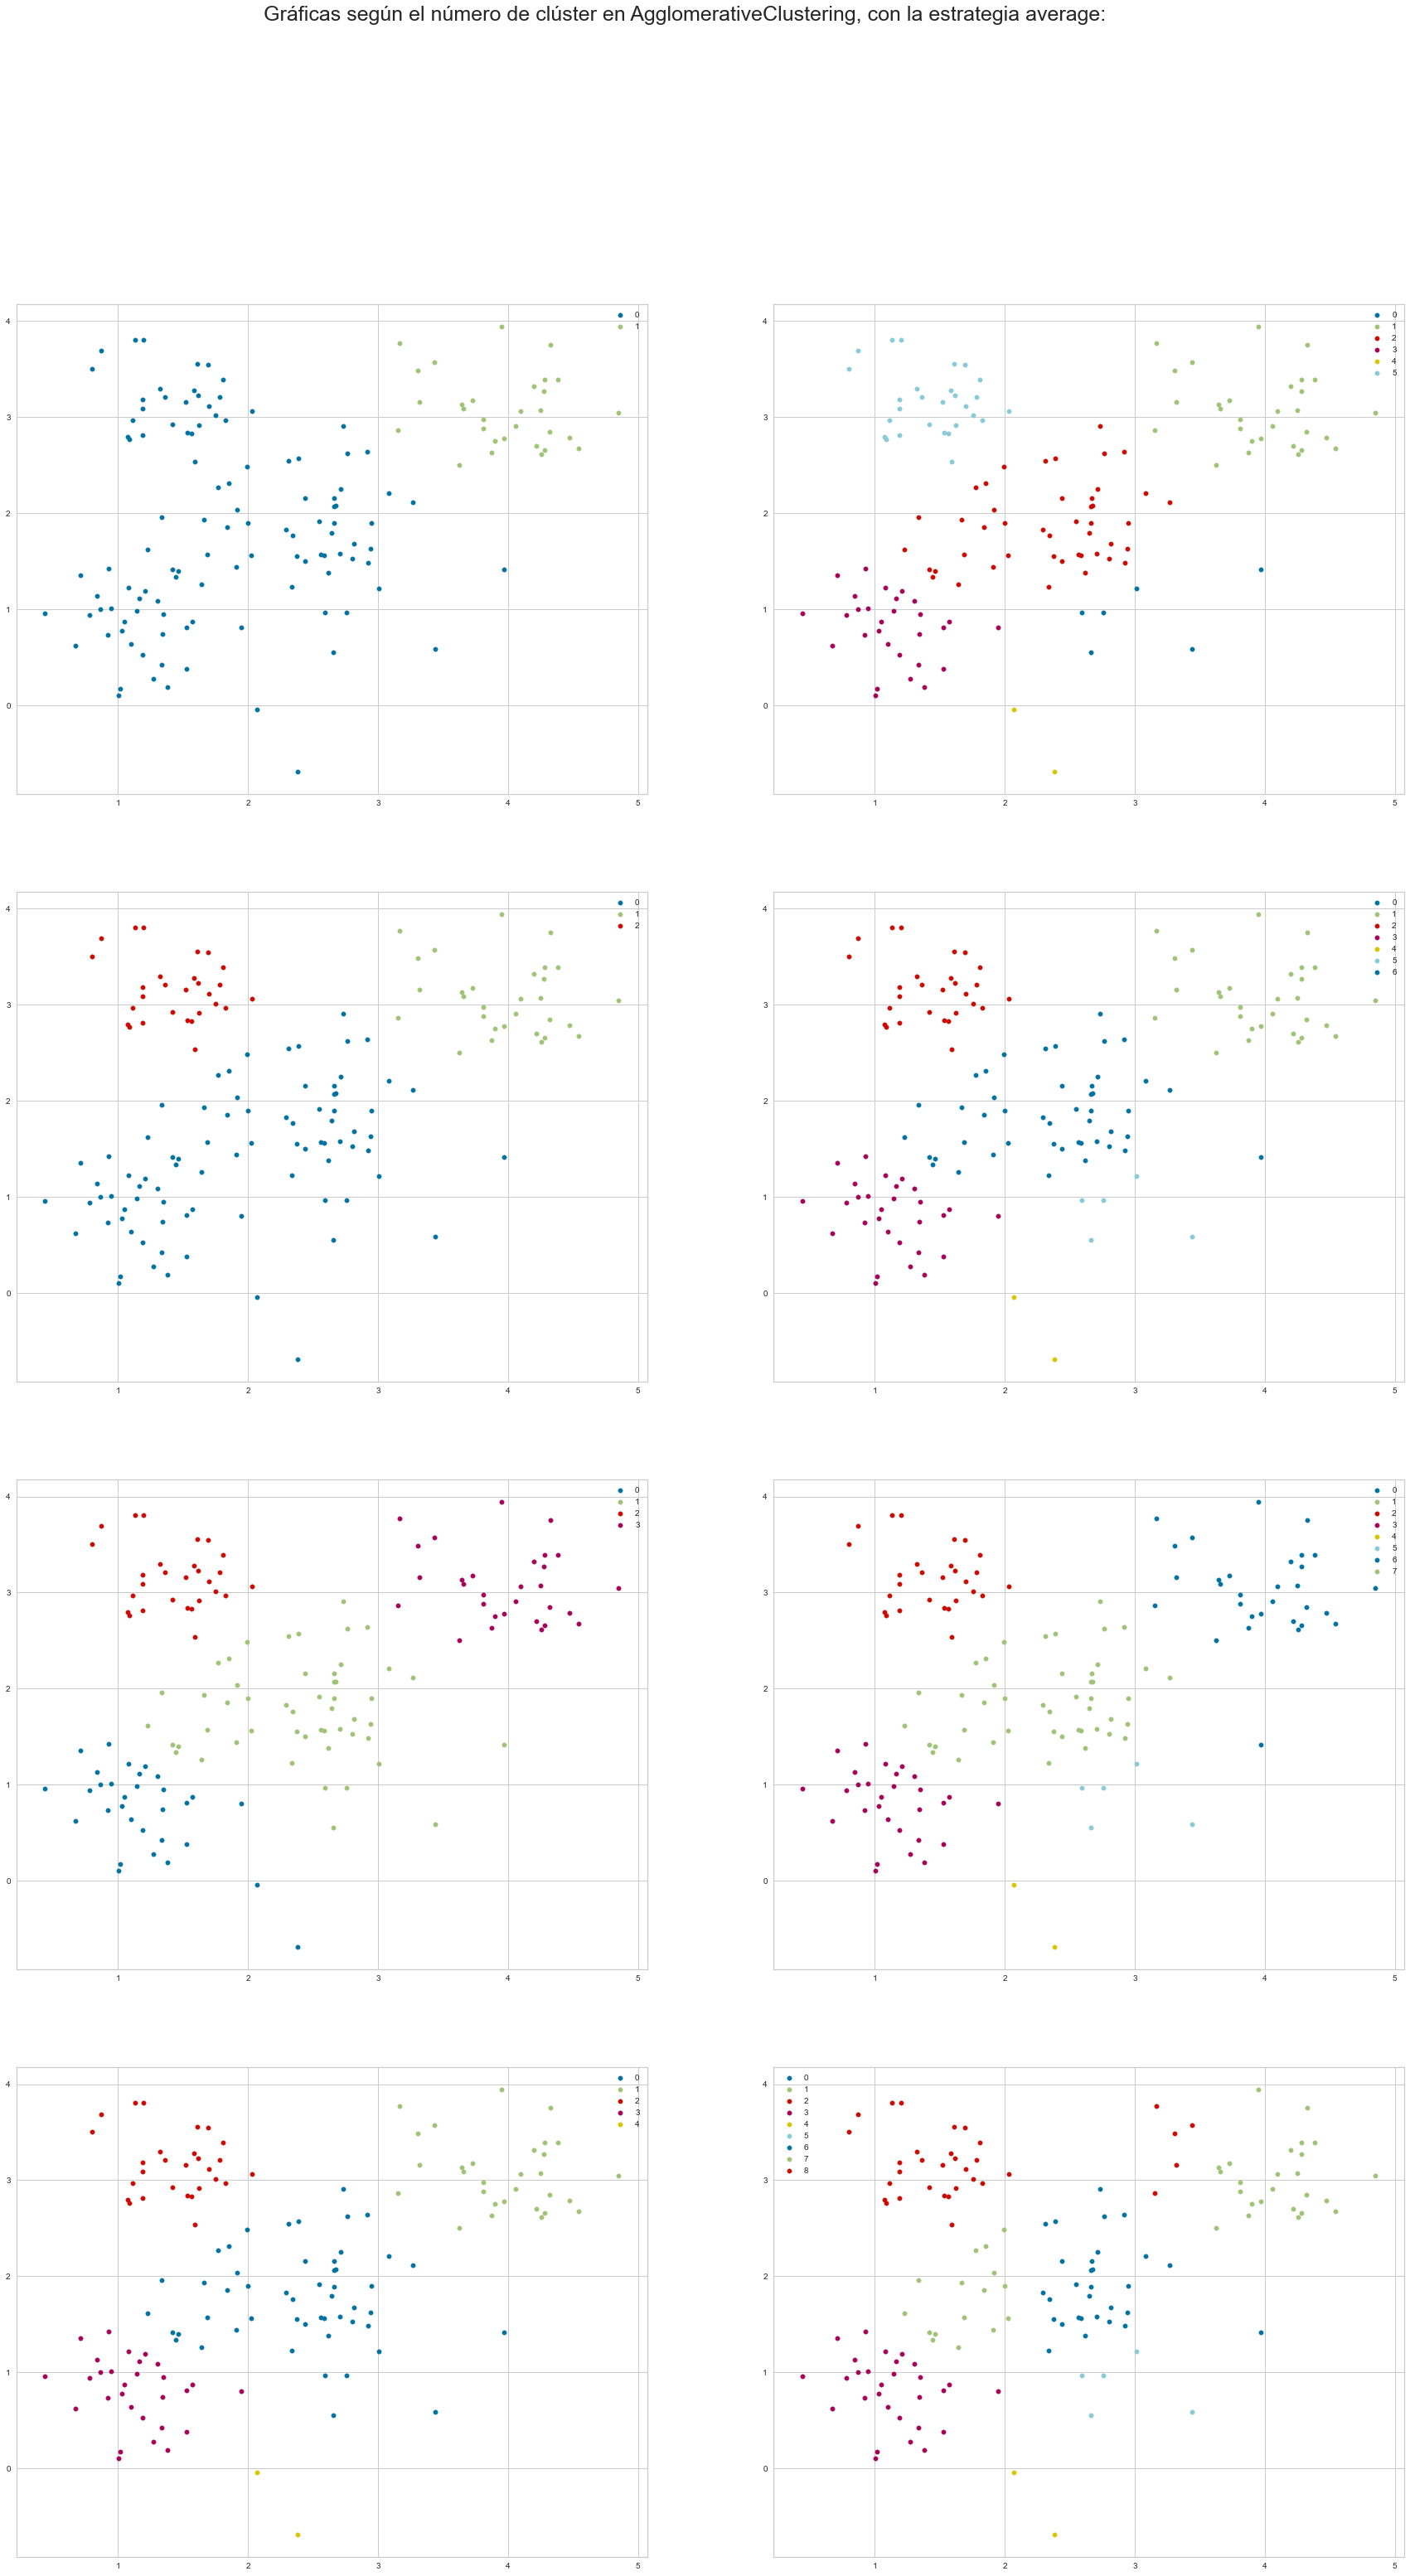

In [23]:
clusters = 8
fig, ax = plt.subplots(nrows=round(clusters/2),ncols=2)
fig.set_figheight(50)
fig.suptitle("Gráficas según el número de clúster en AgglomerativeClustering, con la estrategia average: ", fontsize=25)
fig.set_figwidth(30)
ax = np.concatenate((ax[:,0],ax[:,1]))
for k in range(2,clusters+2):
    Agglomerative = AgglomerativeClustering(n_clusters = k, linkage="average")
    Agglomerative.fit(df)
    df["Labels"] = Agglomerative.labels_
    for label in np.unique(df["Labels"]):
        ax[k-2].scatter(df[(df["Labels"] == label)].iloc[:,0] ,df[(df["Labels"] == label)].iloc[:,1] ,s=30, label = label)
        ax[k-2].legend()
    df = df.drop(columns = ['Labels'])

#### AgglomerativeClustering - single

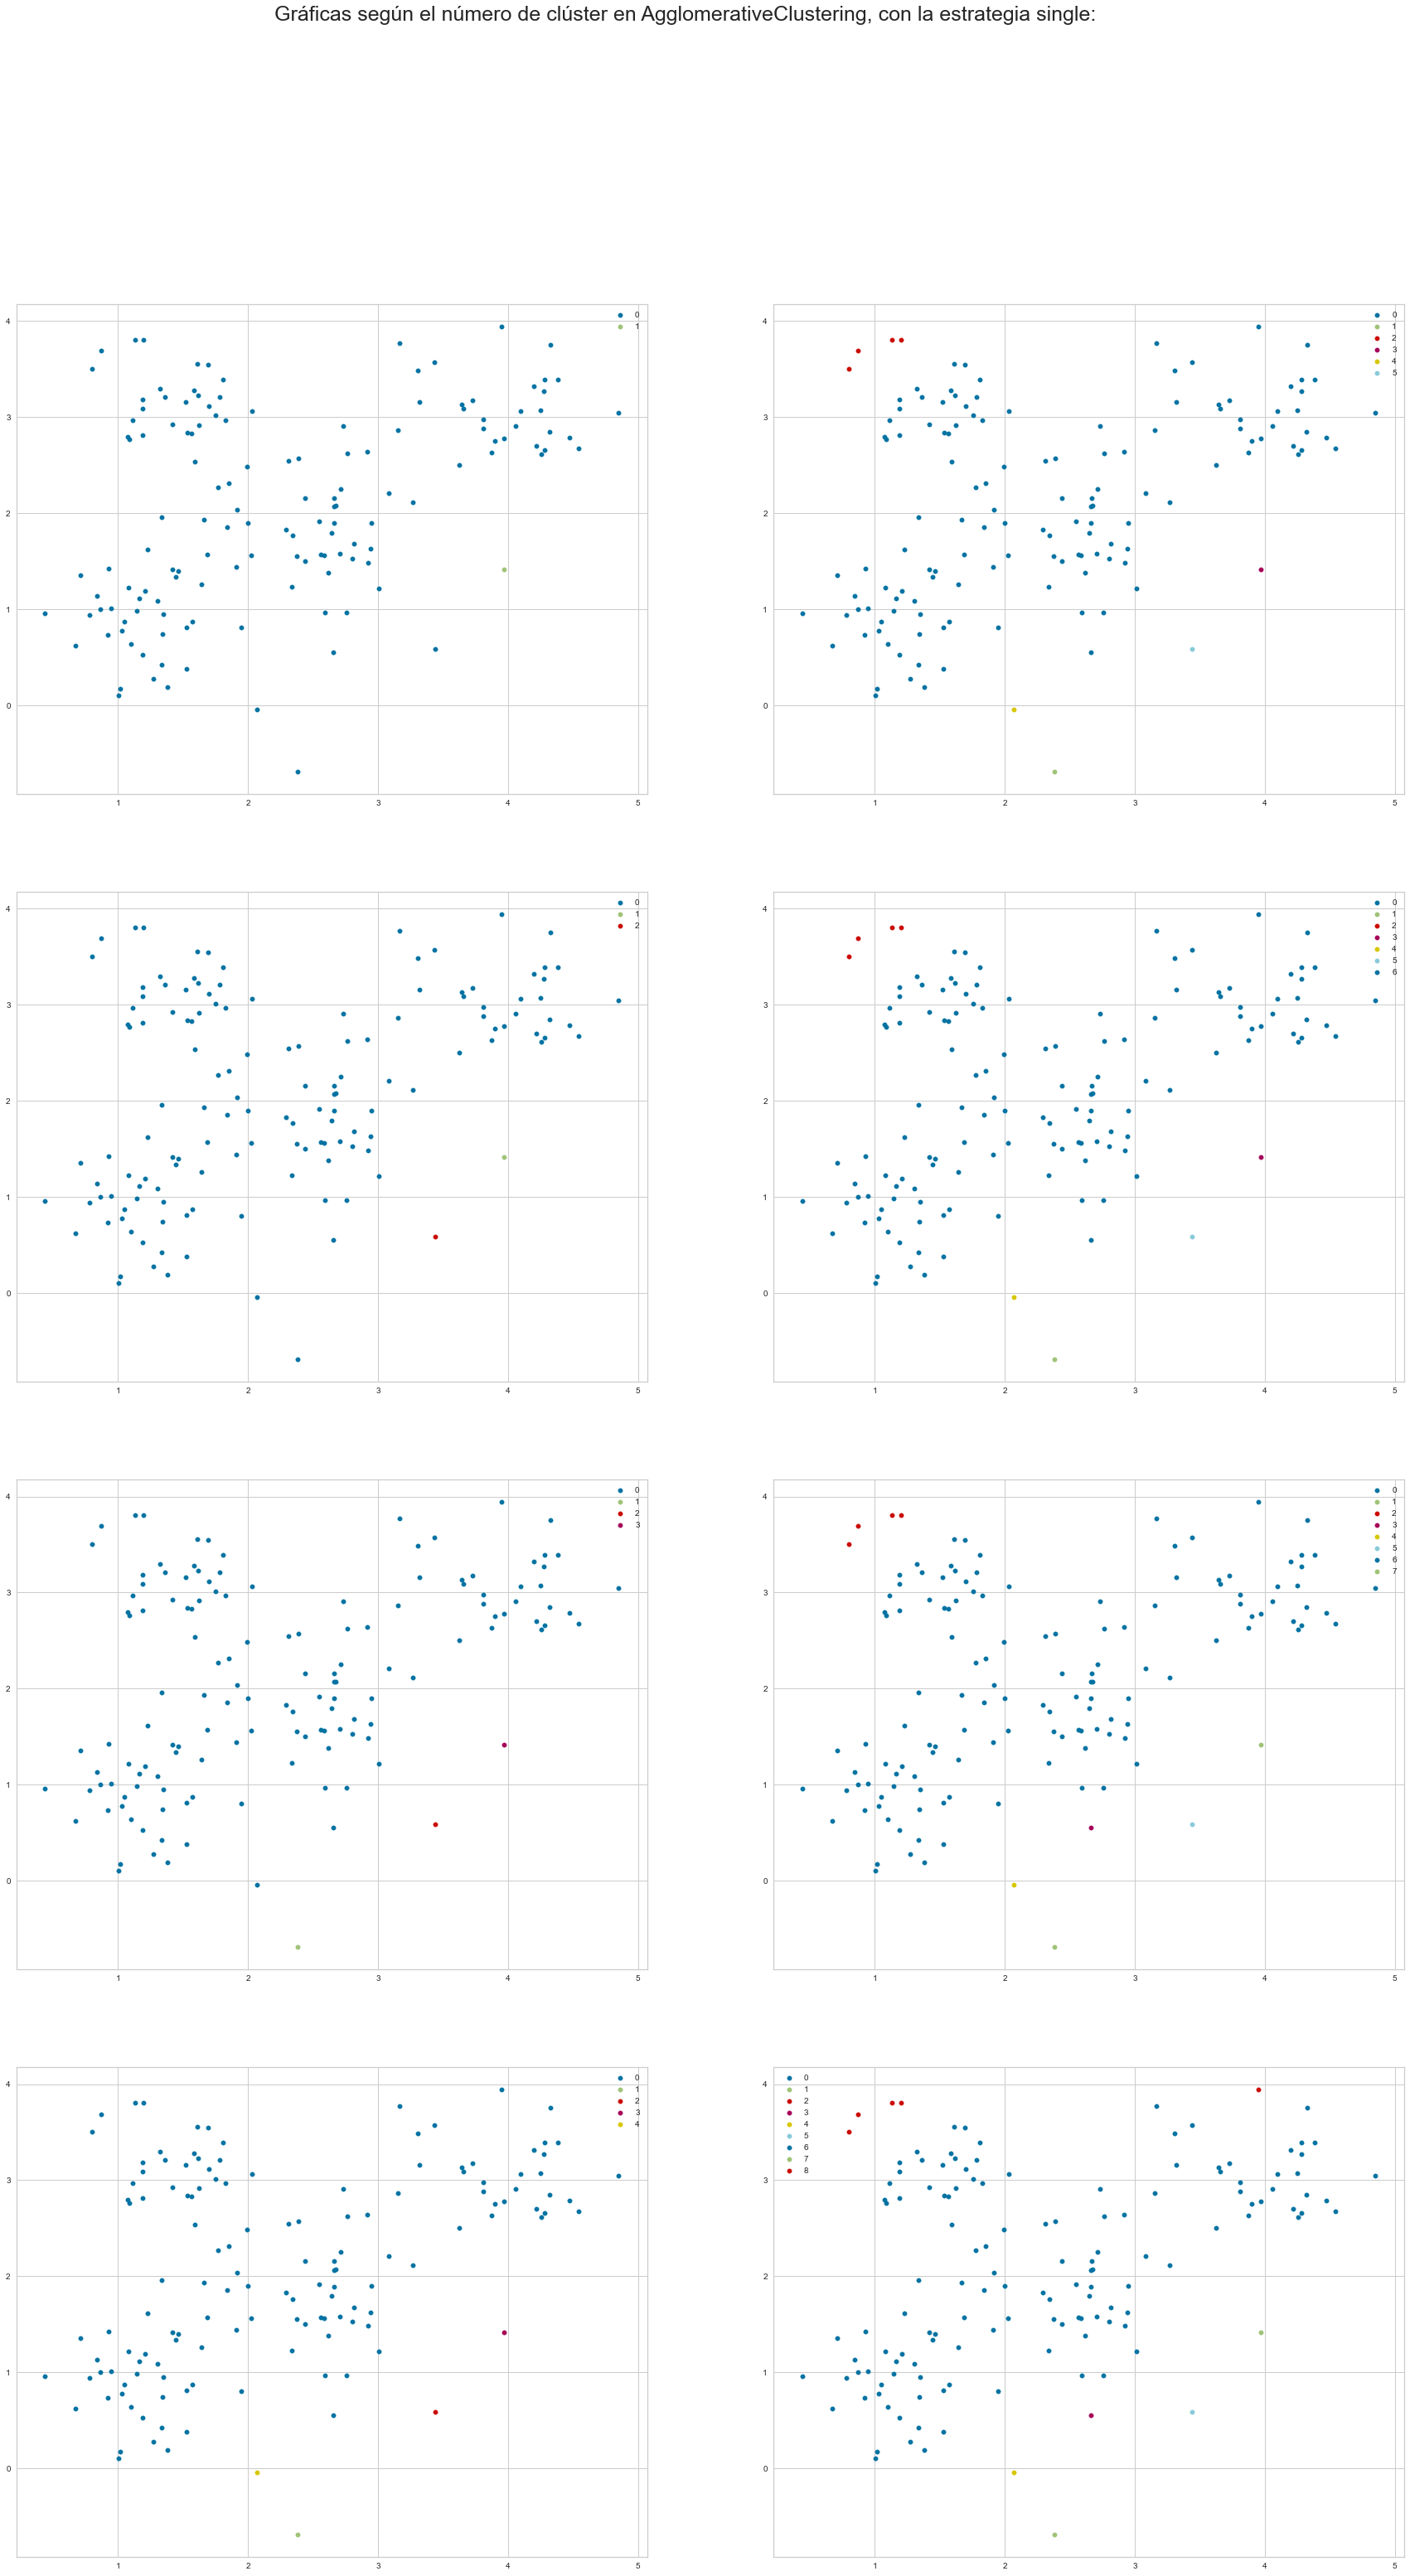

In [24]:
clusters = 8
fig, ax = plt.subplots(nrows=round(clusters/2),ncols=2)
fig.set_figheight(50)
fig.suptitle("Gráficas según el número de clúster en AgglomerativeClustering, con la estrategia single: ", fontsize=25)
fig.set_figwidth(30)
ax = np.concatenate((ax[:,0],ax[:,1]))
for k in range(2,clusters+2):
    Agglomerative = AgglomerativeClustering(n_clusters = k, linkage="single")
    Agglomerative.fit(df)
    df["Labels"] = Agglomerative.labels_
    for label in np.unique(df["Labels"]):
        ax[k-2].scatter(df[(df["Labels"] == label)].iloc[:,0] ,df[(df["Labels"] == label)].iloc[:,1] ,s=30, label = label)
        ax[k-2].legend()
    df =  df.drop(columns = ['Labels'])

#### Análisis completo:

1º gráfico: Como podemos comprobar, en todos los casos los grupos están claramente divididos con unos centroides bien posicionados.

2º gráfico: A través de este segundo método, obtenemos un resultado parecido, los clúster se han dividido de otra forma pero también clasifica de una forma decente las muestras. Esta función usa diferentes métodos para medir la distancia entre muestras y tratar de maximizar la distancia entre clúster a través de diferentes iteraciones, en este caso usamos average, que mide la distancia media entre dos conjuntos.

3º gráfico: En este caso, usamos la misma función pero con el criterio ‘single’ que usa la distancia mínima de todas las observaciones entre dos sets. Por lo tanto, los más lejanos de cualquier otro, serán clasificados en un clúster externo. Por lo tanto, los que no tienen demasiada distancia entre ellos se clasifican todos al mismo clúster, pero los más apartados pertenecen a un clúster de un único elemento.

A continuación, obtenemos según el primer método cuál sería la mejor division de clases usándo como criterio el silhouette_score:

In [25]:
clusters = 8

silhouette_average = {}
for k in range(2,clusters+1):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    labels = kmeans.fit_predict(df)
    silhouette_average[k] = silhouette_score(df, labels, metric='euclidean')

silhouette_average

{2: 0.44877130262927734,
 3: 0.4877547862488226,
 4: 0.5419979277613052,
 5: 0.4849795594807615,
 6: 0.44048959808172083,
 7: 0.451948099708636,
 8: 0.3967175307682873}

El mejor modelo es con 4 clústers, ya que es cuando la media de su silueta está más alta, y por tanto, las muestran están mejor clasificadas. Esto es porque a mayor valor silueta, implica que más cerca están del clúster a la que han sido clasificadas. Por útlimo gráficamos el mejor caso posible:

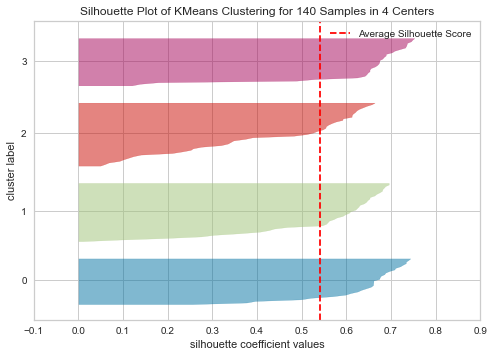

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 140 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
kmeans = KMeans(n_clusters = 4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df)
visualizer.show()